In [56]:
import pandas as pd
import numpy as np
#import warnings
import matplotlib.pyplot as plt
#warnings.filterwarnings("ignore")

# load the csv files

test_df = pd.read_csv('./Downloads/Compressed/heartbeat/mitbih_test.csv',header=None)
train_df = pd.read_csv('./Downloads/Compressed/heartbeat/mitbih_train.csv',header=None)

In [106]:
print(train_df.shape)
print(test_df.shape)
print(test_df.head())

(87554, 188)
(21892, 188)
        0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  


In [109]:
for item in train_df:
    print(item,train_df[item].nunique())

0 23408
1 42845
2 49611
3 41007
4 39328
5 40559
6 40516
7 40423
8 40305
9 39950
10 40106
11 40347
12 40320
13 40628
14 41177
15 41671
16 42091
17 42404
18 42914
19 43188
20 43678
21 44172
22 44576
23 44779
24 45154
25 45500
26 45612
27 46051
28 46434
29 46729
30 46719
31 46839
32 46364
33 46230
34 46283
35 46241
36 46005
37 45864
38 45604
39 45630
40 45347
41 44982
42 44738
43 44358
44 44234
45 43859
46 43714
47 43539
48 43191
49 43062
50 43036
51 42994
52 42901
53 43068
54 43079
55 43168
56 43194
57 43126
58 43094
59 43344
60 43493
61 43551
62 43608
63 43540
64 43689
65 43826
66 43789
67 43571
68 43632
69 43398
70 43182
71 42983
72 42859
73 42587
74 42472
75 42266
76 42506
77 42441
78 42505
79 42155
80 41864
81 41514
82 41141
83 41031
84 40877
85 40759
86 40387
87 40090
88 39757
89 38969
90 38494
91 37927
92 37172
93 36701
94 36032
95 35862
96 35574
97 35019
98 34649
99 34352
100 33787
101 33370
102 32584
103 31973
104 31198
105 30619
106 29791
107 29163
108 28263
109 27653
110 26803


0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


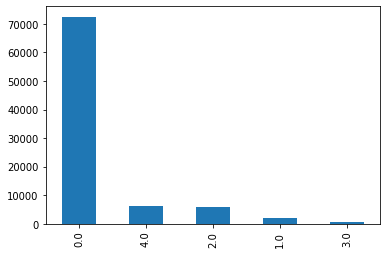

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

CountStatus = pd.value_counts(train_df[187], sort=True)
print(CountStatus)
CountStatus.plot.bar()

In [58]:
M = train_df.values
X = M[:, :-1]
y = M[:, -1]

C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()

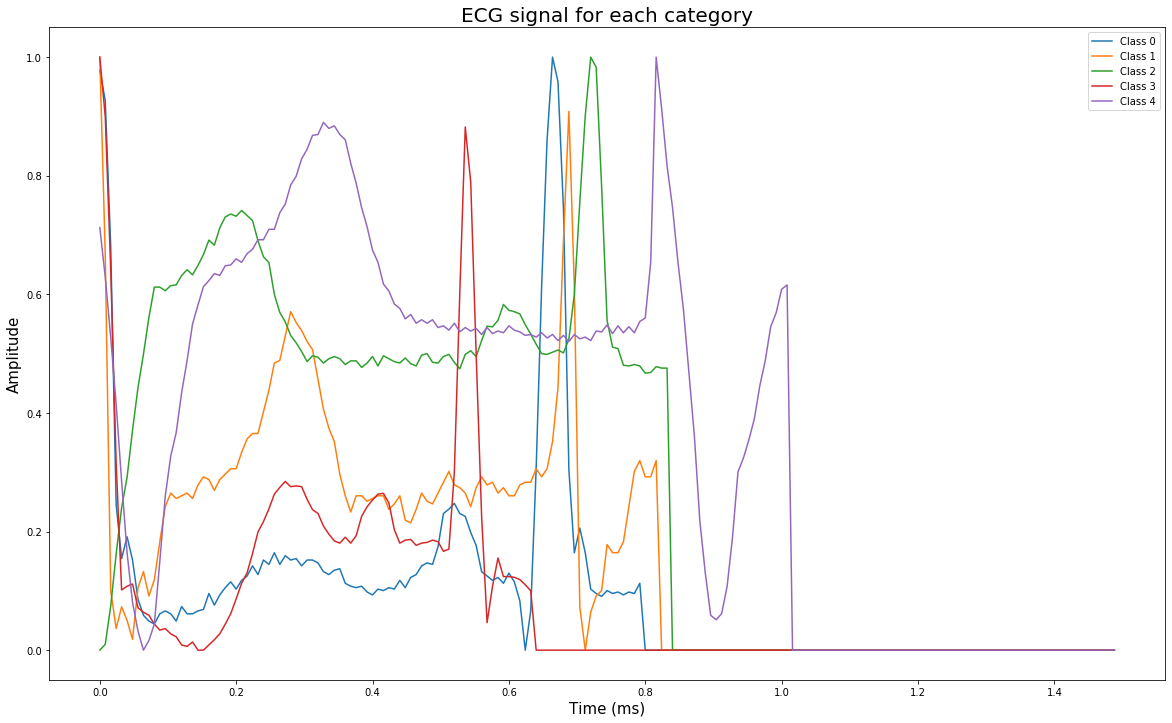

In [59]:
x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,12))
plt.plot(x, X[C0, :][0], label="Class 0")
plt.plot(x, X[C1, :][0], label="Class 1")
plt.plot(x, X[C2, :][0], label="Class 2")
plt.plot(x, X[C3, :][0], label="Class 3")
plt.plot(x, X[C4, :][0], label="Class 4")
plt.legend()
plt.title("ECG signal for each category", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

In [60]:
def stretch(x):
    l = int(187 * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < 187:
        y_ = np.zeros(shape=(187, ))
        y_[:l] = y
    else:
        y_ = y[:187]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor

def augment(x):
    result = np.zeros(shape= (4, 187))
    for i in range(3):
        if random.random() < 0.33:
            new_y = stretch(x)
        elif random.random() < 0.66:
            new_y = amplify(x)
        else:
            new_y = stretch(x)
            new_y = amplify(new_y)
        result[i, :] = new_y
    return result

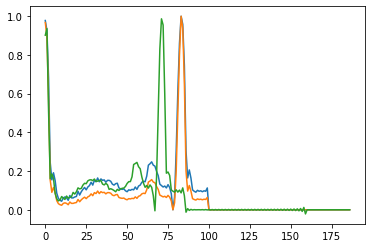

In [61]:
import random
from scipy.signal import resample
plt.plot(X[0, :])
plt.plot(amplify(X[0, :]))
plt.plot(stretch(X[0, :]))
plt.show()

In [62]:
result = np.apply_along_axis(augment, axis=1, arr=X[C3]).reshape(-1, 187)
classe = np.ones(shape=(result.shape[0],), dtype=int)*3
X = np.vstack([X, result])
y = np.hstack([y, classe])

subC0 = np.random.choice(C0, 400)
subC1 = np.random.choice(C1, 400)
subC2 = np.random.choice(C2, 400)
subC3 = np.random.choice(C3, 400)
subC4 = np.random.choice(C4, 400)

from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

X_val = np.vstack([X[subC0], X[subC1], X[subC2], X[subC3], X[subC4]])
y_val = np.hstack([y[subC0], y[subC1], y[subC2], y[subC3], y[subC4]])

X_train = np.delete(X, [subC0, subC1, subC2, subC3, subC4], axis=0)
y_train = np.delete(y, [subC0, subC1, subC2, subC3, subC4], axis=0)

X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_val, y_val = shuffle(X_val, y_val, random_state=0)


In [64]:
X_train = np.expand_dims(X_train, 2)
X_val = np.expand_dims(X_val, 2)
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_val = ohe.transform(y_val.reshape(-1,1))
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_val", X_val.shape)
print("y_val", y_val.shape)

X_train (88283, 187, 1)
y_train (88283, 5)
X_val (2000, 187, 1)
y_val (2000, 5)


In [65]:
n_obs, feature, depth = X_train.shape
batch_size = 500

In [66]:
from keras.layers.convolutional import Conv1D
from keras.models import Model
import keras
from keras import backend as K
from keras.layers import Input
from keras.layers import Activation, Dense ,Flatten , Softmax
from keras.layers import Layer
K.clear_session()

inp = Input(shape=(feature, depth))
C = Conv1D(filters=32, kernel_size=5, strides=1)(inp)

C11 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = Activation("relu")(C11)
C12 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = keras.layers.Add()([C12, C])
A12 = Activation("relu")(S11)
M11 = keras.layers.MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = Activation("relu")(C21)
C22 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = keras.layers.Add()([C22, M11])
A22 = Activation("relu")(S11)
M21 = keras.layers.MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = Activation("relu")(C31)
C32 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = keras.layers.Add()([C32, M21])
A32 = Activation("relu")(S31)
M31 = keras.layers.MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = Activation("relu")(C41)
C42 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = keras.layers.Add()([C42, M31])
A42 = Activation("relu")(S41)
M41 = keras.layers.MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = Activation("relu")(C51)
C52 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = keras.layers.Add()([C52, M41])
A52 = Activation("relu")(S51)
M51 = keras.layers.MaxPooling1D(pool_size=5, strides=2)(A52)

F1 = Flatten()(M51)

D1 = Dense(32)(F1)
A6 = Activation("relu")(D1)
D2 = Dense(32)(A6)
D3 = Dense(5)(D2)
A7 = Softmax()(D3)

model = Model(inputs=inp, outputs=A7)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 187, 1)       0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 183, 32)      192         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 183, 32)      5152        conv1d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 183, 32)      0           conv1d_2[0][0]                   
____________________________________________________________________________________________

In [67]:
from keras.callbacks import LearningRateScheduler
import math
from keras.optimizers import Adam
from keras.models import Model 

In [92]:
def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.75
    t = n_obs//(10000 * batch_size)  # every epoch we do n_obs/batch_size iteration
    lrate = initial_lrate * math.exp(-k*t)
    return lrate

lrate = LearningRateScheduler(exp_decay)



adam = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)




model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=5, 
                    batch_size=batch_size, 
                    verbose=2, 
                    validation_data=(X_val, y_val), 
                    callbacks=[lrate])

Train on 88283 samples, validate on 2000 samples
Epoch 1/5
 - 61s - loss: 0.1337 - accuracy: 0.9628 - val_loss: 0.4933 - val_accuracy: 0.8550
Epoch 2/5
 - 61s - loss: 0.0962 - accuracy: 0.9731 - val_loss: 0.4880 - val_accuracy: 0.8655
Epoch 3/5
 - 64s - loss: 0.0872 - accuracy: 0.9753 - val_loss: 0.4191 - val_accuracy: 0.8665
Epoch 4/5
 - 66s - loss: 0.0768 - accuracy: 0.9783 - val_loss: 0.3458 - val_accuracy: 0.8885
Epoch 5/5
 - 62s - loss: 0.0716 - accuracy: 0.9791 - val_loss: 0.3655 - val_accuracy: 0.8845


In [93]:
# check on validation set
from sklearn.metrics import log_loss , classification_report , confusion_matrix
y_pred = model.predict(X_val, batch_size=1000)
print("log loss : {:.3f}".format(log_loss(y_val.todense(), y_pred)))
print(classification_report(y_val.argmax(axis=1), y_pred.argmax(axis=1)))
# comparable result as RFC, prediction are better for the minority groups


log loss : 0.365
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       400
           1       0.99      0.76      0.86       400
           2       0.93      0.91      0.92       400
           3       0.98      0.76      0.86       400
           4       0.99      0.99      0.99       400

    accuracy                           0.88      2000
   macro avg       0.91      0.88      0.89      2000
weighted avg       0.91      0.88      0.89      2000



In [94]:
M = test_df.values
X_test = M[:, :-1]
y_test = M[:, -1]

In [95]:
X_test = np.expand_dims(X_test, 2)
ohe = OneHotEncoder()
y_test = ohe.fit_transform(y_test.reshape(-1,1))

print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_test (21892, 187, 1)
y_test (21892, 5)


In [96]:
y_test

<21892x5 sparse matrix of type '<class 'numpy.float64'>'
	with 21892 stored elements in Compressed Sparse Row format>

In [97]:
y_pred2 = model.predict(X_test)
print("log loss: {:.3f}".format(log_loss(y_test.todense(), y_pred2)))
print(classification_report(y_test.argmax(axis=1), y_pred2.argmax(axis=1)))
# slightly better result than RFC for the test set

log loss: 0.073
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18118
           1       0.91      0.69      0.79       556
           2       0.97      0.92      0.94      1448
           3       0.85      0.75      0.79       162
           4       0.98      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.94      0.87      0.90     21892
weighted avg       0.98      0.98      0.98     21892



In [39]:
confusion_mat = pd.DataFrame(np.array(confusion_matrix(y_test.argmax(axis=1), y_pred2.argmax(axis=1))),
                         index = ['0', '1','2', '3','4'],
                        columns=['pred_0', 'pred_1','pred_2', 'pred_3','pred_4'])
confusion_mat

,pred_0,pred_1,pred_2,pred_3,pred_4
0,18030,35,25,25,3
1,129,417,4,6,0
2,49,7,1355,33,4
3,17,0,6,139,0
4,28,0,9,1,1570


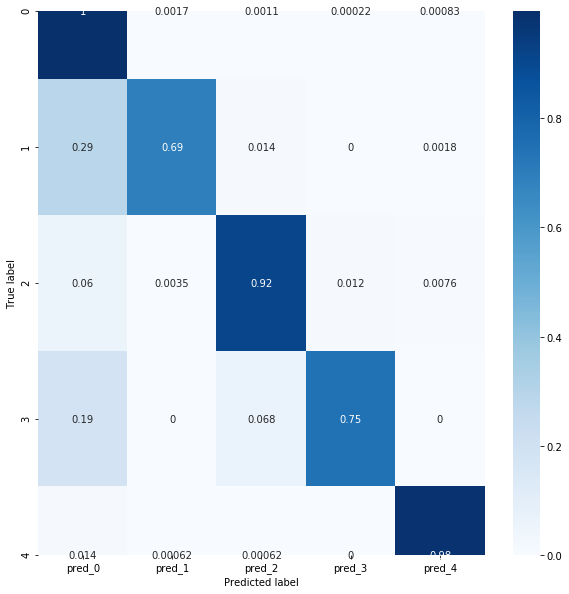

In [99]:
import seaborn as sns
conf_mat=pd.DataFrame(np.array(confusion_matrix(y_test.argmax(axis=1), y_pred2.argmax(axis=1))),
                         index = ['0', '1','2', '3','4'],
                        columns=['pred_0', 'pred_1','pred_2', 'pred_3','pred_4'])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat.apply(lambda x: x/x.sum(),axis=1), annot=True, cmap = 'Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
